In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Connect to a SQLite database file (or create it)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create the 'sales' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert some sample sales data
sample_data = [
    ('Pen', 10, 1.5),
    ('Notebook', 5, 3.0),
    ('Pencil', 20, 0.5),
    ('Pen', 15, 1.5),
    ('Notebook', 10, 3.0),
    ('Pencil', 5, 0.5)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()


In [3]:
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

# Read results into a DataFrame
df = pd.read_sql_query(query, conn)
print(df)


    product  total_qty  revenue
0  Notebook         15     45.0
1       Pen         25     37.5
2    Pencil         25     12.5


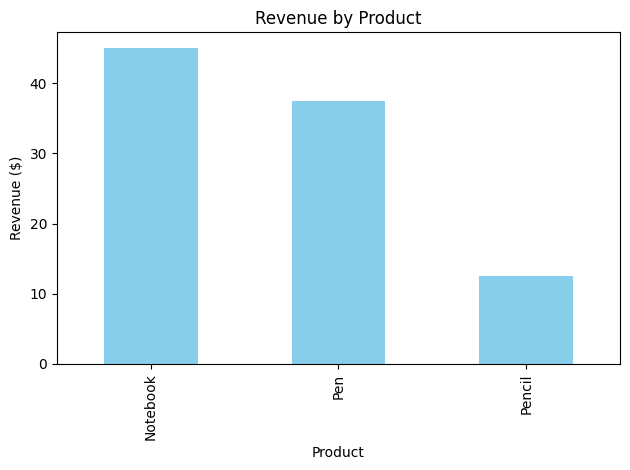

In [4]:
# Plot a bar chart
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()


In [5]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>